In [25]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

In [26]:
import os

# List files in the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/potato-disease/PlantVillage/Potato___healthy/7948ada9-eabc-4cb7-a579-b73e938eb716___RS_HL 4185.JPG
/kaggle/input/potato-disease/PlantVillage/Potato___healthy/f5bd2732-197b-4d8e-bb50-a4966dc416f5___RS_HL 1840.JPG
/kaggle/input/potato-disease/PlantVillage/Potato___healthy/5a3fc4bb-a78c-4276-8934-f0b037ffb860___RS_HL 5412.JPG
/kaggle/input/potato-disease/PlantVillage/Potato___healthy/875d6ded-5f01-495c-a945-ad2e17f87f91___RS_HL 1848.JPG
/kaggle/input/potato-disease/PlantVillage/Potato___healthy/4ae82355-6885-40e7-9807-dabe46ed3441___RS_HL 5410.JPG
/kaggle/input/potato-disease/PlantVillage/Potato___healthy/f30983c0-6e20-43cc-8672-4622ca34c830___RS_HL 1949.JPG
/kaggle/input/potato-disease/PlantVillage/Potato___healthy/5df30492-0b54-474d-8883-bba9474ca88f___RS_HL 1801.JPG
/kaggle/input/potato-disease/PlantVillage/Potato___healthy/2e0b8b4b-e900-408b-b760-730690bbd382___RS_HL 1901.JPG
/kaggle/input/potato-disease/PlantVillage/Potato___healthy/774875d3-438a-4305-afe2-7d59e2925dc4_

In [27]:
dataset_directory ='/kaggle/input/potato-disease/PlantVillage'

In [28]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [29]:
class_names = ds.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

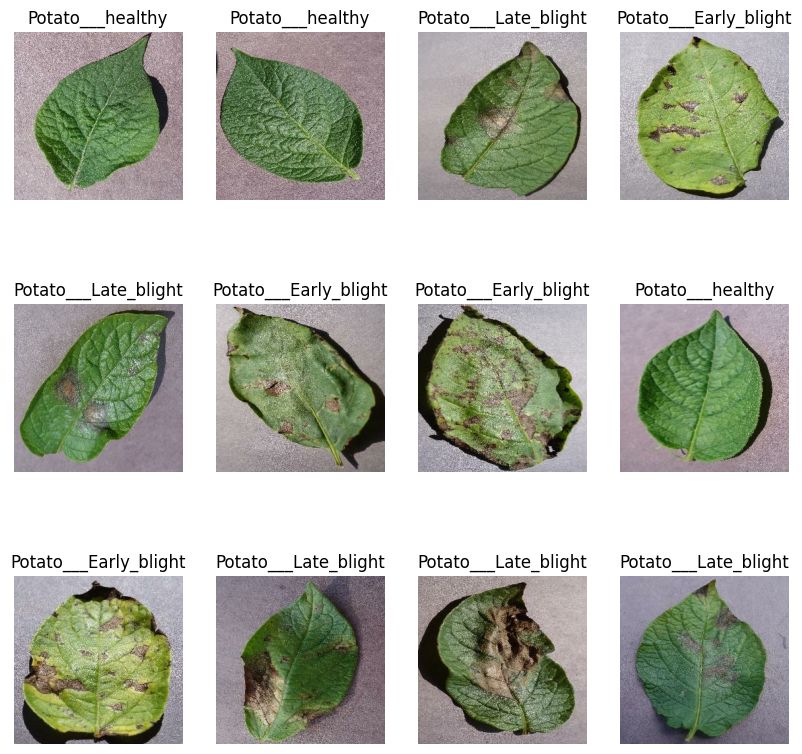

In [30]:
plt.figure(figsize =(10,10))
for image_batch, label_batch in ds.take(1):
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [31]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds, test_ds


In [32]:
train_ds,vald_ds,test_ds = get_dataset_partition_tf(ds)

In [33]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
vald_ds = vald_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [41]:
image_size = 256
batch_size = 32
CHANNELS = 3
epochs = 10

In [42]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1.0/255)
])

In [43]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [44]:
input_shape = (image_size,image_size)
n_classes = 3

In [45]:
CNN = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model (not strictly necessary since the input shape is already specified)
CNN.build(input_shape=(batch_size, image_size, image_size, CHANNELS))

# Print the model summary
CNN.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [47]:
history = CNN.fit(
    train_ds,
    batch_size = batch_size,
    verbose=1,
    validation_data=vald_ds,
    epochs=epochs
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.4428 - loss: 0.9666 - val_accuracy: 0.4688 - val_loss: 0.9142
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5259 - loss: 0.8923 - val_accuracy: 0.7188 - val_loss: 0.6664
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.7439 - loss: 0.5931 - val_accuracy: 0.8177 - val_loss: 0.4119
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.8427 - loss: 0.3770 - val_accuracy: 0.8854 - val_loss: 0.2450
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.8776 - loss: 0.3359 - val_accuracy: 0.8854 - val_loss: 0.2549
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9166 - loss: 0.2186 - val_accuracy: 0.9219 - val_loss: 0.2091
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9141 - loss: 0.2340 - val_accuracy: 0.8958 - val_loss: 0.2336
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9297 - loss: 0.1937 - val_accuracy: 0.9375 - v

In [48]:
scores = CNN.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 749ms/step - accuracy: 0.9395 - loss: 0.1381
